In [1]:
import cv2 # Bildbearbeitung
import matplotlib.pyplot as plt # Bilder anzeigen
import os # Um Bilder in den Ordnern zu finden
import numpy as np # Für Arrays mit denen Tensorflow umgehen kann
import tensorflow as tf # für deep-learning / neuronale Netze

In [2]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

def lade_bild(pfad): # Bild laden und vorverarbeiten
  bild = cv2.imread(pfad) # bild lesen vom rgba-format
  bild_in_grau = cv2.cvtColor(bild, cv2.COLOR_BGR2GRAY) # Alpha-Wert herausfiltern
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren

  return bild_0_1 # Bild an den Aufruf zurückgeben


for zahl in range(11): # Wir haben ordner von 0 bis 9
    pfad = "unsere_daten/"+str(zahl)+"/" # Pfad zusammenbauen
    #print("zahl ist", zahl, "- Der Pfad ist", pfad)
    alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
    for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
      if ".jpg" in name:
          pfad_zum_bild = pfad + name 
          bild = lade_bild(pfad_zum_bild)

          X.append(bild) # Das Bild an X anhängen
          Y.append(zahl) # Die zugehörige Zahl an Y anhängen

Es wird das Bild mit dem index 2760 angezeigt
Y ist  10


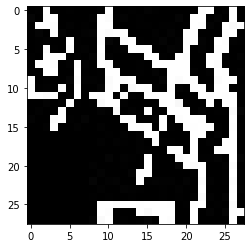

In [6]:
index = 2760

print("Es wird das Bild mit dem index", index, "angezeigt")
plt.imshow(X[index], cmap = "gray"), 
print("Y ist ", Y[index])

In [4]:
# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere Speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

# X und Y gleichmäßig mischen
# X und Y werden so gemischt, dass Y[index] die Zahl enthält die in X[index] gespeichert ist
p = np.random.permutation(Y.shape[0]) 
X = X[p]
Y = Y[p] 

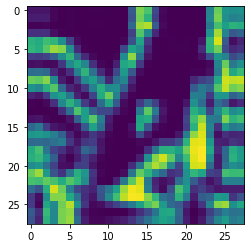

In [5]:
random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(X[3].reshape(1,28,28,1), training=True)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05), (-0.05,0.05)) (random_gedreht, training=True)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben, training=True)

plt.imshow(random_Zoom.numpy()[0].reshape(28,28))

In [7]:
inputlayer = tf.keras.layers.Input(shape=(28,28)) # unser Bild hat die Form [Höhe, Breite]

bild_3_d = tf.keras.layers.Reshape((28,28,1)) (inputlayer)

random_gedreht = tf.keras.layers.RandomRotation((-0.05, 0.05))(bild_3_d)
random_verschieben = tf.keras.layers.RandomTranslation((-0.2,0.2), (-0.2,0.2)) (random_gedreht)
random_Zoom = tf.keras.layers.RandomZoom((-0.3,0.1)) (random_verschieben)

filter_1 = tf.keras.layers.Conv2D(16,7, activation="relu") (random_Zoom)
drop1 = tf.keras.layers.Dropout(0.2)(filter_1)
pool1 = tf.keras.layers.MaxPooling2D()(drop1)

filter_2 = tf.keras.layers.Conv2D(16,3, activation="relu") (pool1)
drop2 = tf.keras.layers.Dropout(0.2)(filter_2)
pool2 = tf.keras.layers.MaxPooling2D()(drop2)

filter_3 = tf.keras.layers.Conv2D(3,1, activation="relu") (pool2) # von 5x5x16 auf 5x5x5


platt = tf.keras.layers.Flatten()(filter_3)

x = tf.keras.layers.Dense(16,activation="relu")(platt)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8,activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)

output = tf.keras.layers.Dense(11,activation="softmax", use_bias = False)(x)

model = tf.keras.Model(inputlayer, output)
print("")
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_translation_1 (Rando  (None, 28, 28, 1)        0         
 mTranslation)                                                   
                                                                 
 random_zoom_1 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 22, 22, 16)        800  

In [8]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.Adam(0.002)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [ ]:
model.fit(X, Y, batch_size = 16, epochs = 100, validation_split = 0.2) # Parameter optimieren

2022-03-30 10:35:25.711511: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37829568 exceeds 10% of free system memory.


Epoch 1/100
  2/754 [..............................] - ETA: 1:19 - loss: 2.3971 - accuracy: 0.2500   

2022-03-30 10:35:39.207422: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22878208 exceeds 10% of free system memory.
2022-03-30 10:35:39.223796: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22878208 exceeds 10% of free system memory.
2022-03-30 10:35:39.245528: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24074496 exceeds 10% of free system memory.
2022-03-30 10:35:39.246982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24074496 exceeds 10% of free system memory.


754/754 [==============================] - ETA: 0s - loss: 2.3628 - accuracy: 0.1230

In [ ]:
model.save("model.h5") # Netzwerk und Parameter speichern